<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793509/blob/main/IBM%20-%20Data%20Analysis%20with%20Python/Semana%207%20-%20Data%20Analysis%20with%20Python%20(IBM)%20(M%C3%B3dulo%204).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

📅 Semana 7

🚀 Curso: Data Analysis with Python (IBM: DA0101EN)

📖 Módulo 4

Alberto José García Porras (**A01793509**)


---

☝ **Desarrollo de Modelos:**


Los modelos nos permiten entender la relación entre las variables de entrada (atributos independientes) de cara a la predicción de la variable de salida (atributo dependiente), de tal manera que podamos realizar predicciones de observaciones futuras a partir de los datos con los que contamos.

---

☝ **NOTA:** Estaré trabajando con la base de datos **website-trafficcsv** que mide el tráfico de usuarios que ingresa diariamente a un sitio web universitario.

---

👓 Siguiendo lo aprendido en el módulo 1 utilizaremos el método **read_csv()** de la librería **Pandas** para leer los datos e introducirlos en nuestro dataframe.

---

In [1]:
#Importamos la librería pandas y leemos el archivo website-traffic.csv
import pandas as pd
url = "https://openmv.net/file/website-traffic.csv"
df = pd.read_csv(url)
#Visualizamos los primeros 10 registros
df.head(10)

,DayOfWeek,MonthDay,Year,Visits
0,Monday,June 1,2009,27
1,Tuesday,June 2,2009,31
2,Wednesday,June 3,2009,38
3,Thursday,June 4,2009,38
4,Friday,June 5,2009,31
5,Saturday,June 6,2009,24
6,Sunday,June 7,2009,21
7,Monday,June 8,2009,29
8,Tuesday,June 9,2009,30
9,Wednesday,June 10,2009,22


---



☝**PARA TENER EN CUENTA:** Convertiremos los datos categóricos de la variable de entrada a numéricos con el fin de que podamos trabajar mejor nuestro ejercicio.

---


In [40]:
#Convertimos las dos variables de entrada que utilizaremos para nuestro ejercicio
df.DayOfWeek = pd.Categorical(df.DayOfWeek)
df['DayOfWeek'] = df.DayOfWeek.cat.codes

df.MonthDay = pd.Categorical(df.MonthDay)
df['MonthDay'] = df.MonthDay.cat.codes

print(df.head(10))

   DayOfWeek  MonthDay  Year  Visits
0          1        93  2009      27
1          5       104  2009      31
2          6       115  2009      38
3          4       117  2009      38
4          0       118  2009      31
5          2       119  2009      24
6          3       120  2009      21
7          1       121  2009      29
8          5       122  2009      30
9          6        94  2009      22


---

👣 **REGRESIÓN LINEAL SIMPLE:** Este método nos permite entender la relación entre dos variables, una de entrada llamada independiente (X) y otra de salida llamada dependiente o variable a predecir (Y). El resultado obtenido con este método será una función lineal que predice la respuesta (Y) en función de la variable predictora (X).
Su fórmula se expresa de la siguiente manera:
***Y^ = a + bX***
*   La variable **a** es igual a la intercepción de la regresión lineal o el valor de Y cuando X es igual a 0.
*   La variable **b** es igual a la pendiente de la regresión lineal o el valor con el que Y cambia cuando se incrementa 1 unidad en X.





---


🙌 **Manos a la obra !!!**

In [14]:
#Importamos el método de regresión lineal de la librería sklearn
from sklearn.linear_model import LinearRegression

#Asignamos a la variable LR el objeto del modelo a utilizar
LR = LinearRegression()

In [16]:
#Vamos a utilizar 'DayOfWeek' para predecir el número de visitas ('Visits') al sitio web.
#Capturamos nuestra variable independiente (X) y nuestra variable a predecir o dependiente (Y)
X = df[['DayOfWeek']]
Y = df['Visits']

#Ajustamos el modelo de regresión lineal simple para las variables X y Y
LR.fit(X, Y)

LinearRegression()

In [22]:
#Obtenemos la variable dependiente (Y)
Ypred=LR.predict(X)
Ypred[0:7]  

array([20.27109523, 24.15985098, 25.13203991, 23.18766204, 19.29890629,
       21.24328417, 22.2154731 ])



---


✍Ahora validamos la intercepción (**a**) y la pendiente (**b**) para validar nuestro modelo de regresión lineal según la formula indicada en la parte superior.


---

In [31]:
print("Nuestra intercepción (a) es: ", LR.intercept_)
print("Nuestra pendiente (b) es: ", LR.coef_)
print("Nuestro modelo LR es:")
print(LR.intercept_ + (LR.coef_ * + df['DayOfWeek']))

Nuestra intercepción (a) es:  19.298906294254778
Nuestra pendiente (b) es:  [0.97218894]
Nuestro modelo LR es:
0      20.271095
1      24.159851
2      25.132040
3      23.187662
4      19.298906
         ...    
209    22.215473
210    20.271095
211    24.159851
212    25.132040
213    23.187662
Name: DayOfWeek, Length: 214, dtype: float64


---

👣 **REGRESIÓN LINEAL MÚLTIPLE:** Este método es similar al anterior, la diferencia es que nos permite entender la relación entre una variable dependiente a predecir (Y) y diferentes variables independientes (X1, X2, X3, etc).El resultado obtenido con este método será una función lineal que predice la respuesta (Y) en función de la variable predictora (X).
Su fórmula se expresa de la siguiente manera:

***Y^ = a + b1X1 + b2X2 + b3X3 + b4X4***
*   La variable **a** es igual a la intercepción de la regresión lineal o el valor de Y cuando X es igual a 0.
*   La variable **b** es igual a la pendiente de la regresión lineal o el valor con el que Y cambia cuando se incrementa 1 unidad en X.





---



🙌 **Manos a la obra !!!**

In [41]:
#Vamos a utilizar 'DayOfWeek' y 'MonthDay' para predecir el número de visitas ('Visits') al sitio web.
#Capturamos nuestras variables independientes (X) y nuestra variable a predecir o dependiente (Y)
Xmr = df[['DayOfWeek', 'MonthDay']]
Y = df['Visits']

#Ajustamos el modelo de regresión lineal simple para las variables X y Y
LR.fit(Xmr, Y)

LinearRegression()


---


✍Ahora validamos la intercepción (**a**) y la pendiente (**b**) para identificar las variables de nuestro modelo de regresión lineal múltiple según la formula indicada en la parte superior.


---

In [42]:
print("Nuestra intercepción (a) es: ", LR.intercept_)
print("Nuestra pendiente (b) es: ", LR.coef_)

Nuestra intercepción (a) es:  14.598158221009173
Nuestra pendiente (b) es:  [0.96930251 0.04422029]


---

👣 **EVALUAR MODELOS UTILIZANDO HERRAMIENTAS DE VISUALIZACIÓN:** Este mecanismo facilita la visualización en los resultados del modelo, de tal forma que podamos realizar el afinamiento requerido con el fin de mejorar progresivamente el desempeño del modelo.





---


**📊 Plot de Regresión:** Esta herramienta mostrará una combinación de puntos de datos dispersos y la línea de regresión lineal ajustada a través de los datos. De esta forma, obtendremos una estimación razonable de la relación existente entre dos variables, así como también si la corelación es fuerte y la dirección de dicha correlación (positiva o negativa).

In [43]:
#Primero cargamos las librerias requeridas para este tipo de graficación
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0.0, 50.25)

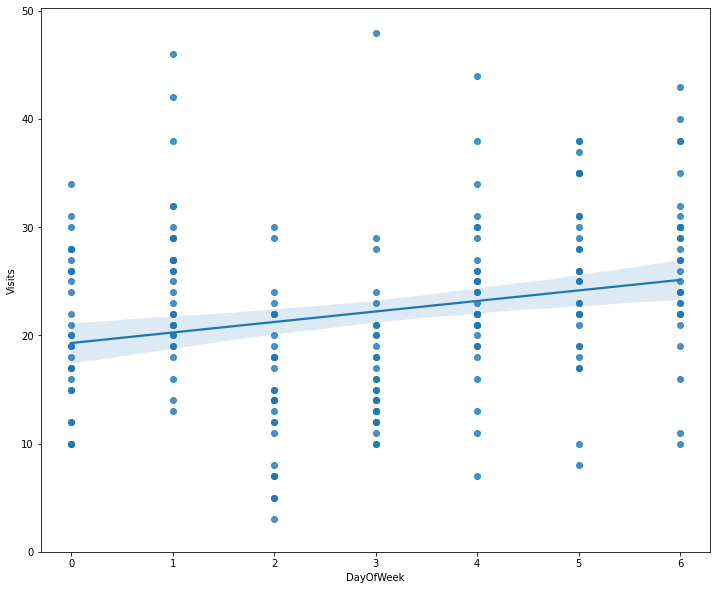

In [38]:
#Generamos el plot de regresión lineal para la variable 'DayOfWeek'.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="DayOfWeek", y="Visits", data=df)
plt.ylim(0,)

(0.0, 50.25)

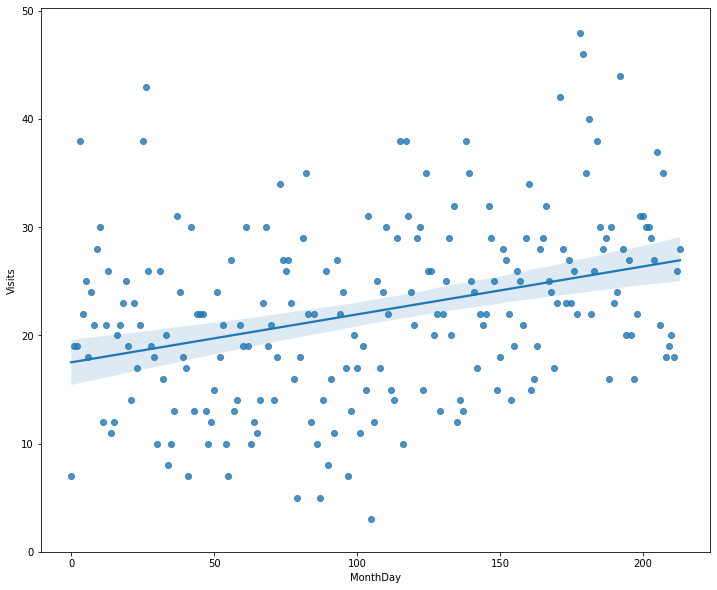

In [44]:
#Generamos el plot de regresión lineal para la variable 'MonthDay'.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="MonthDay", y="Visits", data=df)
plt.ylim(0,)



---


✍ Las dos gráficas muestran una correlación positiva entre las variables independientes y la dependiente, ya que a medida que aumentan los valores de 'DayOfWeek' y 'MonthDay' aumentan las visitas. Por otra parte, vemos que para 'MonthDay' los puntos de los datos están mucho más cerca de la línea de regresión que con 'DayOfWeek', lo que nos daría a entender que con esta variable ('MonthDay') funciona mejor nuestro modelo de regresión lineal para realizar las predicciones. De hecho, lo corroboraremos con la matriz de correlación a continuación.


---



In [47]:
df[["DayOfWeek","MonthDay","Visits"]].corr()

,DayOfWeek,MonthDay,Visits
DayOfWeek,1.000000,0.002116,0.234178
MonthDay,0.002116,1.000000,0.329131
Visits,0.234178,0.329131,1.000000


---


ℹ Tal como lo mostraron los plot de regresión la variable '**MonthDay**' muestra una mayor correlación con la variable a predecir '**Visits**':

*   Correlación 'MonthDay' - 'Visits': **0.329131**
*   Correlación 'DayOfWeek' - 'Visits': **0.234178**


---

**📊 Plot Residual:** El residuo es la diferencia entre el valor observado (y) y la variable a predecir (y^), o en otra palabras, es la distancia entre el punto del dato y la linea de regresión ajustada. Por lo tanto, esta herramienta nos mostrará los residuos en el eje vertical Y y las variables independientes en el eje X.

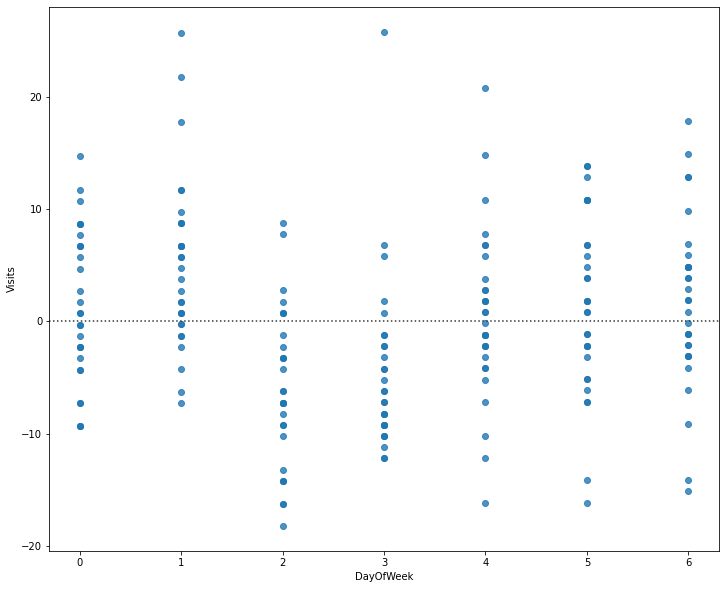

In [48]:
#Generamos el plot residual para la variable 'DayOfWeek'.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['DayOfWeek'],y=df['Visits'])
plt.show()

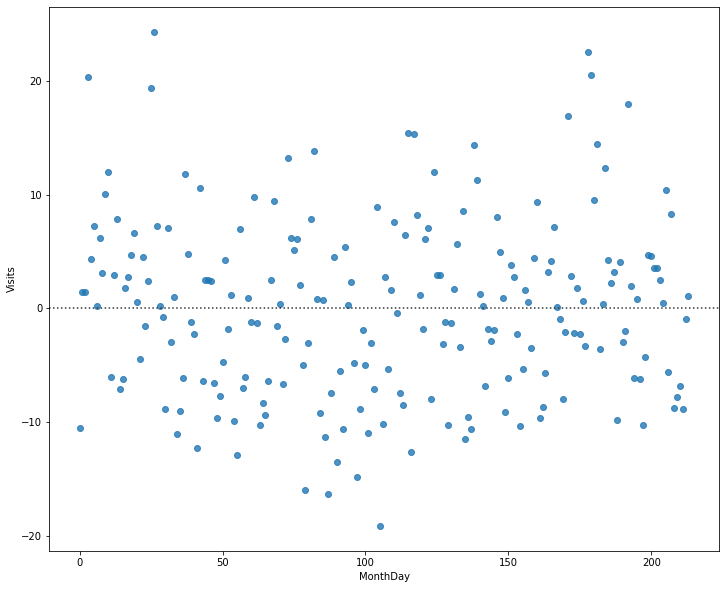

In [49]:
#Generamos el plot residual para la variable 'MonthDay'.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['MonthDay'],y=df['Visits'])
plt.show()



---


✍ Teniendo en cuenta que en este tipo de gráficos, cuando los puntos se encuentran esparcidos aleatoriamente alrededor del eje X se considerará un buen modelo, observamos que con la variable 'MonthDay' obtenemos mejores resultados y nos podría servir un modelo de regresión lineal, caso contrario al mostrado con la variable 'DayOfWeek'.


---

**📊 Plot de Distribución:** El residuo es la diferencia entre el valor observado (y) y la variable a predecir (y^), o en otra palabras, es la distancia entre el punto del dato y la linea de regresión ajustada. Por lo tanto, esta herramienta nos mostrará los residuos en el eje vertical Y y las variables independientes en el eje X.

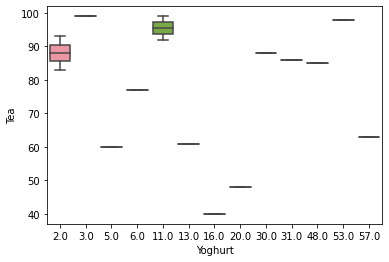

In [ ]:
#Realizaremos el ejercicio con las variables 'Yoghurt' y 'Tea'
sns.boxplot(x="Yoghurt", y="Tea", data=df)

✍ Por el tipo de dato existente en nuestro conjunto, probablemente este tipo de visualización no nos brinde buenas herramientas, sin embargo, es una técnica útil para determinar aquellos atributos que contribuirán en mayor medida a la predicción de la variable de salida.

---

👓 **ANÁLISIS DESCRIPTIVO ESTADÍSTICO:** A través de la función '**describe**' podemos visualizar rápidamente datos estadísticos para aquellas variables continuas. Los datos que podemos visualizar con esta función son:
*   El conteo de las apariciones de la variable.
*   La media.
*   La desviación estandar.
*   El valor mínimo.
*   Los rangos del intercuartíl (25%, 50% y 75%).
*   El valor máximo.


---

In [ ]:
#Al ejecutar el comando 'describe' se cargarán los datos estadísticos para todos los campos numéricos del conjunto de datos
df.describe()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
count,16.000000,16.000000,16.000000,15.000000,15.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,16.000000
mean,78.562500,39.250000,78.500000,18.000000,60.666667,49.000000,18.312500,12.750000,21.875000,15.87500,66.812500,70.500000,41.937500,55.187500,42.312500,75.812500,69.125000,54.187500,20.533333,27.750000
std,23.145824,23.147354,18.540047,10.902162,19.841035,15.427249,20.178268,9.574271,13.980343,12.78997,17.581122,14.033294,23.256451,22.592679,34.677022,20.910026,26.849891,28.842604,18.980692,25.026652
min,27.000000,10.000000,40.000000,2.000000,22.000000,27.000000,1.000000,2.000000,4.000000,2.00000,22.000000,42.000000,8.000000,16.000000,5.000000,31.000000,24.000000,13.000000,2.000000,3.000000
25%,71.500000,17.000000,62.500000,11.000000,56.000000,36.250000,3.750000,6.500000,13.750000,6.50000,56.750000,65.250000,28.000000,40.250000,11.000000,64.500000,47.750000,29.500000,5.500000,10.500000
50%,89.000000,39.000000,84.500000,19.000000,62.000000,47.000000,11.500000,10.000000,19.500000,13.00000,71.500000,72.000000,43.000000,54.000000,25.500000,83.000000,79.000000,52.500000,13.000000,21.000000
75%,96.000000,54.250000,92.250000,26.500000,75.000000,58.000000,20.000000,17.000000,26.250000,21.50000,81.000000,77.250000,50.750000,72.000000,81.500000,94.000000,94.000000,83.250000,30.500000,31.000000
max,98.000000,86.000000,99.000000,35.000000,91.000000,75.000000,76.000000,39.000000,54.000000,45.00000,87.000000,94.000000,89.000000,91.000000,91.000000,97.000000,97.000000,94.000000,57.000000,93.000000


In [ ]:
#Podríamos generar estadísticas para campos tipo 'object', utilizando el comando 'describe' con el parámetro 'include=['object'] tal como se ve a continuación.
df.describe(include=['object'])

,Country
count,16
unique,16
top,Germany
freq,1



---

☝ **Analizando valores categóricos**: Una buena forma de saber el número de repeticiones de una característica en nuestros datos es utiilizando el método **"value_counts"**




In [ ]:
#Utilizamos la variable 'Yoghurt'
df['Yoghurt'].value_counts()

11.0    2
2.0     2
30.0    1
5.0     1
57.0    1
53.0    1
20.0    1
31.0    1
6.0     1
13.0    1
48.0    1
16.0    1
3.0     1
Name: Yoghurt, dtype: int64

In [ ]:
#Agregando al final el comando 'to_frame()' podemos obtener el arrego en un dataframe
df['Yoghurt'].value_counts().to_frame()

,Yoghurt
11.0,2
2.0,2
30.0,1
5.0,1
57.0,1
53.0,1
20.0,1
31.0,1
6.0,1
13.0,1


---

☝ **NOTA:** Ahora vamos a emplear la función rename para visualizar de una mejor manera la información.

---

In [ ]:
#Capturamos el número de ocurrencias en un dataframe llamado 'ocurrencias_yoghurt'
ocurrencias_yoghurt = df['Yoghurt'].value_counts().to_frame()
#Renombramos la columna con el número de ocurrencias
ocurrencias_yoghurt.rename(columns={'Yoghurt': 'Apariciones'}, inplace=True)
#Renombramos la columna del indice
ocurrencias_yoghurt.index.name = 'Yoghurt'

ocurrencias_yoghurt

,Apariciones
Yoghurt,
11.0,2
2.0,2
30.0,1
5.0,1
57.0,1
53.0,1
20.0,1
31.0,1
6.0,1


---


📚 **Agrupamiento**: El método '**groupby**' nos permite agrupar los datos en las diferentes categorías existentes. La data puede agruparase a partir de una o varias variables, teniendo en cuenta que el análisis es realizado sobre los grupos individuales.


---

In [ ]:
#Vemos las diferentes categorías que podrían considerarse en el variable 'Margarine
df['Margarine'].unique()

array([85, 24, 47, 97, 80, 94, 78, 72, 48, 32, 91, 51, 25])

In [ ]:
#Asignaremos las variables 'Margarine' y 'Country' al grupo 1
df_grupo1 = df[['Margarine','Country']]
#Calculamos el promedio de 'Margarine' por país
df_grupo1=df_grupo1.groupby(['Margarine'],as_index=False).mean()
df_grupo1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Margarine
0,24
1,25
2,32
3,47
4,48
5,51
6,72
7,78
8,80
9,85


---

☝ **NOTA:** Podemos visualizar los datos de una mejor manera representándolos como una tabla pivote, que no es más que una representación tipo Excel con una variable a nivel de columna y otra(s) a nivel de registro(s), esto se logra utilizando el comando "df.pivot(index='VariableRegistros',columns='VariableColumna')".

---

In [ ]:
#Indicamos en nuestro pivote la variable 'Country' a nivel de filas y la variable 'Margarine' a nivel de columnas.
#Rellenamos los valores perdidos o faltantes con cero.
pivot_agrupado = df.pivot(index='Country',columns='Margarine').fillna(0)
pivot_agrupado

Real coffee                                                        \
Margarine            24    25    32    47    48    51    72    78    80    85   
Country                                                                         
Austria             0.0   0.0   0.0   0.0   0.0   0.0  55.0   0.0   0.0   0.0   
Belgium             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  94.0   0.0   
Denmark             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
England             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Finland             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
France              0.0   0.0   0.0  88.0   0.0   0.0   0.0   0.0   0.0   0.0   
Germany             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  90.0   
Holland             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Ireland             0.0  30.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Italy              82.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Luxembourg          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Norway              0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Portugal            0.0   0.0   0.0   0.0   0.0   0.0   0.0  72.0   0.0   0.0   
Spain               0.0   0.0   0.0   0.0   0.0  70.0   0.0   0.0   0.0   0.0   
Sweden              0.0   0.0  97.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Switzerland         0.0   0.0   0.0   0.0  73.0   0.0   0.0   0.0   0.0   0.0   

             ... Crisp bread                                                \
Margarine    ...          47    48    51    72   78   80    85    91    94   
Country      ...                                                             
Austria      ...         0.0   0.0   0.0  11.0  0.0  0.0   0.0   0.0   0.0   
Belgium      ...         0.0   0.0   0.0   0.0  0.0  5.0   0.0   0.0   0.0   
Denmark      ...         0.0   0.0   0.0   0.0  0.0  0.0   0.0  34.0   0.0   
England      ...         0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  28.0   
Finland      ...         0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  64.0   
France       ...         3.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0   
Germany      ...         0.0   0.0   0.0   0.0  0.0  0.0  26.0   0.0   0.0   
Holland      ...         0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0   
Ireland      ...         0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0   
Italy        ...         0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0   
Luxembourg   ...         0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  24.0   
Norway       ...         0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  62.0   
Portugal     ...         0.0   0.0   0.0   0.0  9.0  0.0   0.0   0.0   0.0   
Spain        ...         0.0   0.0  13.0   0.0  0.0  0.0   0.0   0.0   0.0   
Sweden       ...         0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0   
Switzerland  ...         0.0  30.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0   

                   
Margarine      97  
Country            
Austria       0.0  
Belgium       0.0  
Denmark       0.0  
England       0.0  
Finland       0.0  
France        0.0  
Germany       0.0  
Holland      15.0  
Ireland       0.0  
Italy         0.0  
Luxembourg    0.0  
Norway        0.0  
Portugal      0.0  
Spain         0.0  
Sweden        0.0  
Switzerland   0.0  

[16 rows x 247 columns]

👓 **Mapa de calor**: Podemos utilizar esta herramienta para visualizar gráficamente los hallazgos de la tabla pivote creada anteriormente, validando de forma visual la relación entre las variables utilizadas.

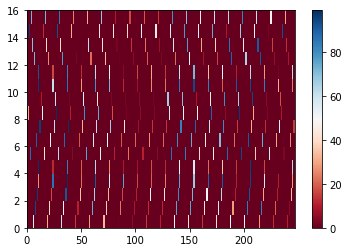

In [ ]:
plt.pcolor(pivot_agrupado, cmap='RdBu')
plt.colorbar()
plt.show()

---

👓 **CORRELACIÓN Y CAUSACIÓN:** Estos términos son clave para el análisis de la relación existente entre los datos del conjunto:
*   **Correlación**: es una medida de la extensión de la interdependencia existente entre las variables.
*   **Causación**: La relación existente entre la causa y el efecto entre dos variables.
Es importante tener clara la diferencia entre estos dos términos, ya que la correlación no implica causación. De igual forma, determinar la correlación es mucho más fácil que determinar la causación, ya que esta última puede requerir experimentación independiente.

---

☝ **Correlación de Pearson**: Esta técnica mide la dependencia lineal entre dos variables, generando un resultado entre -1 y 1;
*   **1**: correlación lineal positiva perfecta.
*   **0**: no existe correlación entre las variables.
*  **-1**: correlación lineal negativa perfecta.
La correlación de Pearson es calculada a través del método '**Corr**' utilizado al comienzo de este notebook.


☝ **P-value**: Es el valor probabilístico de que la correlación existente entre dos variables sea estadisticamente significante. Normalmente se selecciona un valor significante de 0.05, lo cual indica que existirá un 95% de confianza de que la relación de las variables sea significante.


*   **<0.001**: evidencia fuerte de que la correlación es significante.
*   **<0.05**: evidencia moderada de que la correlación es significante.
*   **<0.1**: evidencia débil de que la correlación es significante.
*   **>0.1**: no hay evidencia de que la correlación sea significante.
Este valor lo podemos utilizar con el método "**stats**" de la librería **scipy**.

In [ ]:
#Importamos el método de la librería 
from scipy import stats

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Margarine'], df['Tea'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.24574882597314607  with a P-value of P = 0.3589132582574581


✍ Por los resultados, no existe ninguna correlación entre las variables, ya que el coeficiente de person tiende a cero y el P-value es mayor a 0.1, por lo cual no existe evidencia de que la correlación sea significante.

---

👓 **ANOVA (ANalysis Of VAriance):** Es un método estadístico utilizado para probar si existen diferencias significativas entre las medias de dos o más grupos. Esta función devolverá dos parámetros:
*   **F-test score**: ANOVA asume que la media de todos los grupos es igual, por lo tanto, calcula la desvaiación de la media de lo asumido y la reporta a través de este parámetro.
*   **P-value**: Indica cuan significante estadísticamente es nuestro score calculado.

---

### 🗞 **CONCLUSIÓN**: Una vez se hayan aplicado las técnicas y métodos comentados anteriormente, tendrémos una mejor idea de los datos con los que contamos, por ende, habremos identificado aquellas variables importantes para las predicciones de nuestro modelo. Lo cual redundará en desempeños altos, ya que alimentar nuestro modelo de aprendizaje con variables significativas para las predicciones mejorará sustancialmente su desempeño.